#Read

In [1]:
import matplotlib.pyplot as plt

In [24]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy
import pandas as pd

#total=read_csv('/content/drive/MyDrive/Istraživanja/gledanost/20210512/total.csv')
total=read_csv('/content/_total4.csv')
  

In [25]:
total=pd.DataFrame(total)

In [26]:
total.date = pd.to_datetime(total.date)

In [27]:
total.vrijeme = pd.to_datetime(total.vrijeme)

In [28]:
total.start = pd.to_datetime(total.start)
total.stop = pd.to_datetime(total.stop)

In [29]:
total.sort_values(by=['date'], inplace=True)

In [30]:
r2=[]
from datetime import  timedelta
for i,row in total.iterrows():
    t=row.start
   # for m in row.length.m:
    #print(row.deltalength.seconds//60)
    row.deltalength = row.date - row.start
    
    r2.append({
        'channel':row.channel,
        'start':row.start,
        'stop':row.stop,
        'title':row.title,
        'kategorija':row.kategorija,
        'descr':row.descr,
        'repriza':row.repriza,
        'm_from_start':row.deltalength.seconds//60,
        'timestamp':row.vrijeme,
        'd':row.vrijeme.day,
        'h':row.vrijeme.hour,
        'm':row.vrijeme.minute,
        'date': row.date,
        'broj_gledatelja':row.broj_gledatelja,
        'vrijeme':row.vrijeme,
        'datum_ukupno':row.datum_ukupno,
        'h_x':row.date.hour,
        'dow':row.date.dayofweek
    })
        

r2_df=pd.DataFrame(r2)
#r2_df

In [ ]:
r2_df.to_csv(r'/content/\total4_p.csv', index=False)

In [31]:
#total.date=pd.to_datetime(total.date)
#total['dow']=total.date.dt.dayofweek
dataset=r2_df.copy()#.columns
dataset = pd.get_dummies(dataset, columns=['kategorija'], prefix='', prefix_sep='')

dataset.dropna(inplace=True)
#51468.000000
#dataset=dataset[dataset['broj_gledatelja']>100]
dataset['repriza']=dataset['repriza'].map({'da':1, 'ne':0 })
look_back=30
for i in range(1,look_back+1):
  dataset['increment'+str(i)]=dataset['broj_gledatelja'].shift(periods=(i))

In [ ]:
# Za hrt4 maknut 'IGRANI PROGRAM', ide prije 'OBRAZOVANJE'

In [ ]:
dataset

In [33]:
from sklearn.model_selection import train_test_split
import math


bcols=['repriza', 'h_x','dow',
       'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA',
       'OBRAZOVANJE', 'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST' ,'increment30','increment29','increment28',
       'increment27', 'increment26', 'increment25', 'increment24', 'increment23',
       'increment22', 'increment21', 'increment20', 'increment19',
       'increment18', 'increment17', 'increment16', 'increment15',
       'increment14', 'increment13', 'increment12', 'increment11', 'increment10',
       'increment9', 'increment8', 'increment7'] #, 'increment6', 'increment5']
       #'increment4', 'increment3', 'increment2', 'increment1']#,'increment50', 
       #'increment45', 'increment40', 'increment35','increment30', 'increment25', 
       #'increment20', 'increment15', 'increment10', 'increment9', 'increment8', 
       #'increment7', 'increment6', 'increment5', 'increment4', 'increment3']
      
chlcol='broj_gledatelja'
dataset2=dataset.dropna()
dataset2.sort_values(by=['datum_ukupno'], inplace=True)
training_inputs=dataset2[bcols] 
training_outputs=dataset2[chlcol] 
 
 
X_train, X_test, y_train, y_test = train_test_split(training_inputs , training_outputs ,test_size=0.3 ,shuffle=True)
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X_train

In [ ]:
dataset2

#plot

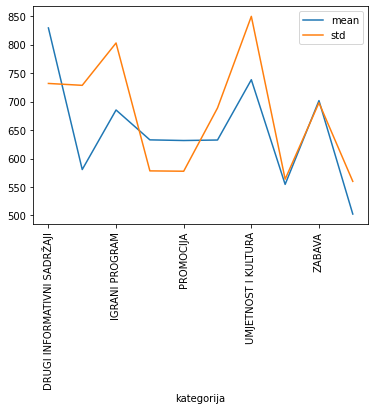

In [ ]:
total.groupby('kategorija')['broj_gledatelja'].agg(['mean','std']).plot(rot=90)

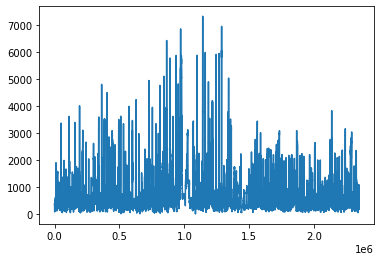

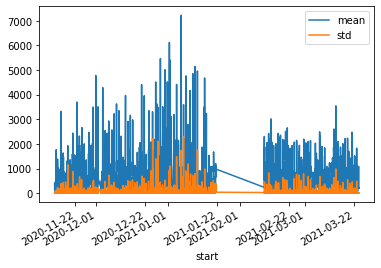

In [ ]:
total['broj_gledatelja'].plot()
total.groupby('start')['broj_gledatelja'].agg(['mean','std']).plot()


In [ ]:
import seaborn as sns
   
# sns.pairplot(dataset[[ 'm_from_start',  'repriza',
#        'IGRANI PROGRAM', 'OBRAZOVANJE', 
#        'VIJESTI', 'ZABAVA', 'ZNANOST','broj_gledatelja']], kind='kde')
sns.pairplot(dataset[['increment45','increment40','increment35', 'increment30','increment25','increment20','increment15',
                      'increment5','broj_gledatelja']], diag_kind='kde')

#by show

In [ ]:

#dataset=total.groupby(['channel', 'start', 'stop', 'title', 'descr','kategorija',  'repriza',   'd_x' ,'h_x','dow' ]).agg('mean')['broj_gledatelja'].reset_index()
#dataset


dataset=total.groupby(['channel', 'start', 'stop', 'title', 'kategorija',  'repriza', 'dow' ]).agg('mean')['broj_gledatelja'].reset_index()
dataset

In [ ]:
import pandas as pd
#dataset=dataset[dataset['broj_gledatelja']>100]
dataset = pd.get_dummies(dataset, columns=['kategorija'], prefix='', prefix_sep='')
dataset['repriza']=dataset['repriza'].map({'da':1, 'ne':0 })
i=1

dataset['increment'+str(i)]=dataset['broj_gledatelja'].shift(periods=(i))


In [ ]:
dataset.drop_duplicates(subset=['start', 'stop', 'title'] ,keep='first', inplace=True)

In [ ]:

dataset.describe()

In [ ]:
from sklearn.model_selection import train_test_split
import math


bcols=[ 'repriza','dow',
        'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA',
       'IGRANI PROGRAM', 'OBRAZOVANJE', 'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST' ,'increment1','increment45', 'increment40', 'increment35',
       'increment30','increment25','increment20','increment15','increment5']
chlcol='broj_gledatelja'
dataset2=dataset.dropna()
training_inputs=dataset2[bcols] 
training_outputs=dataset2[chlcol] 
 
 
X_train, X_test, y_train, y_test = train_test_split(training_inputs , training_outputs ,test_size=0.3 ,shuffle=True)


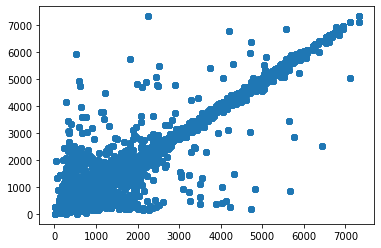

In [ ]:
import matplotlib.pyplot as plt

x = dataset.broj_gledatelja
y = dataset.increment5

plt.scatter(x, y)
plt.show()

#LinearRegression

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
reg = LinearRegression( fit_intercept=True, normalize=True)
reg.fit(X_train, y_train)
 
#print(X_train.columns)
print(reg.coef_)

print(reg.intercept_)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

[ 2.17953955e+01  2.22103935e+00  2.53458927e+00 -9.33383492e+13
 -9.33383492e+13 -9.33383492e+13 -9.33383492e+13 -9.33383492e+13
 -9.33383492e+13 -9.33383492e+13 -9.33383492e+13  5.18741720e-02
 -2.99836955e-02  5.42527518e-02 -5.28942671e-02 -2.55462515e-03
  4.39454870e-02 -6.98199468e-02  1.24920639e-03  9.27199437e-03
 -1.73751867e-02  2.36004841e-02  2.50793720e-02 -2.35059039e-02
 -7.69168203e-03  1.48378342e-02  1.57271682e-02 -4.33428331e-02
  6.08969043e-03 -5.17168934e-03  3.93618465e-03  1.57642580e-02
 -5.79693735e-02 -8.08393141e-02  1.01667062e+00]
93338349217420.66
train score 0.8114523083451928
test score 0.8074115304556185


In [35]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':reg.predict(X_test)})
df

,Real Values,Predicted Values
95242,890,830.078125
95162,319,390.265625
98731,872,835.140625
113223,1086,1199.468750
45683,711,864.546875
...,...,...
114683,292,306.109375
96327,2044,2157.375000
102394,328,372.140625
82479,898,1304.796875


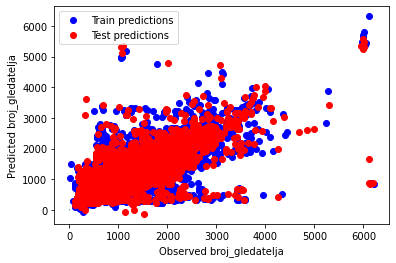

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Predicted ' + chlcol)
plt.legend()

MLP Regressor

In [38]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(activation='relu', solver='adam', learning_rate = 'constant', shuffle=True,
                    max_iter=100,   
                   alpha=0.0001, hidden_layer_sizes= tuple(100 for _ in range(10)))
#ann.max_iter=1000
ann.fit(X_train, y_train)     
print('Train score',ann.score(X_train, y_train)    )
print('Test score',ann.score(X_test, y_test)    )   

Train score 0.8248179492036416
Test score 0.8149052685359686


In [39]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':reg.predict(X_test)})
df

,Real Values,Predicted Values
95242,890,882.250732
95162,319,406.363037
98731,872,911.639648
113223,1086,1232.533936
45683,711,845.240723
...,...,...
114683,292,261.263916
96327,2044,2225.287842
102394,328,383.960693
82479,898,1288.189209


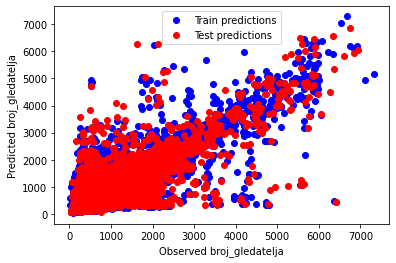

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.plot( y_train,ann.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,ann.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Predicted ' + chlcol)
plt.legend()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neural_network import MLPRegressor

# mlpr = MLPRegressor(max_iter=1000)#,hidden_layer_sizes= tuple(10 for _ in range(4)))

# param_list = {"activation": ["identity", "logistic", "tanh", "relu"], "solver": [ "adam"], "alpha": [0.00005,0.05]}

# param_list = {
#     'hidden_layer_sizes': [(100,100,100),   (10,10,10,10,10,10)],
#     'activation': ['identity',  'relu'],
#     'solver': [ 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# gridCV = GridSearchCV(estimator=mlpr, param_grid=param_list,verbose=3)
# #"hidden_layer_sizes": [(1,),(50,)], "lbfgs", 
# #splits = TimeSeriesSplit(n_splits=3)

# #pyplot.figure(1)
# #index = 1
 
# gridCV.fit(X_train, y_train)
# predicted = gridCV.predict(X_test)
# parameters = mlpr.get_params()
# test_mse = mean_squared_error(y_test, predicted)
# print(parameters)
# print(test_mse)
# sorted(gridCV.cv_results_.keys())

In [ ]:
#gridCV.best_params_

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
317278.0780391359
['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_activation',
 'param_alpha',
 'param_hidden_layer_sizes',
 'param_learning_rate',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']
 


#random forest regressor





In [40]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 0.7483599756434922
test score 0.7523031067896575


In [41]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':reg.predict(X_test)})
df

,Real Values,Predicted Values
95242,890,732.170678
95162,319,340.620967
98731,872,732.170678
113223,1086,1257.757212
45683,711,732.170678
...,...,...
114683,292,340.620967
96327,2044,1967.956708
102394,328,340.620967
82479,898,1257.757212


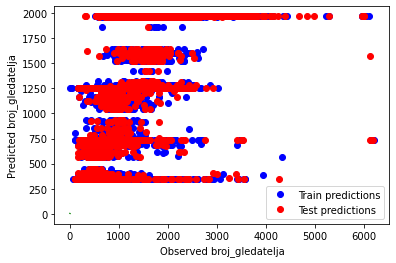

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Predicted ' + chlcol)
plt.legend()

#DecisionTreeRegressor


In [42]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3, random_state=0)
reg.fit(X_train, y_train)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 0.7917149425850303
test score 0.7979619958254561


In [43]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':reg.predict(X_test)})
df

,Real Values,Predicted Values
95242,890,852.735198
95162,319,275.093109
98731,872,852.735198
113223,1086,1118.499836
45683,711,852.735198
...,...,...
114683,292,275.093109
96327,2044,2265.132106
102394,328,275.093109
82479,898,1390.780042


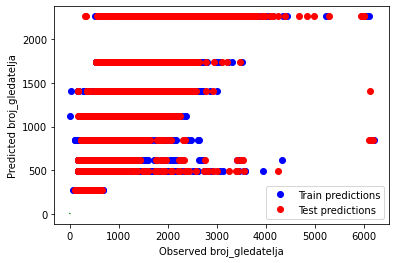

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Predicted ' + chlcol)
plt.legend()

#Polynomial regresson

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import cross_val_scor
# X=podaci[cols]
# y=podaci['speed_2d_[m/s]']
#X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=64)
scaler = StandardScaler()
polynomial_features = PolynomialFeatures(degree=2)#, include_bias=True
linear_regression = LinearRegression()# fit_intercept=True, normalize=False)

reg = Pipeline([('scaler',scaler),("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
print('train score',reg.score(X_train, y_train))
print('test score',reg.score(X_test, y_test))

train score 0.840584704163467
test score 0.8121481205255924


In [37]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':reg.predict(X_test)})
df

,Real Values,Predicted Values
95242,890,882.250732
95162,319,406.363037
98731,872,911.639648
113223,1086,1232.533936
45683,711,845.240723
...,...,...
114683,292,261.263916
96327,2044,2225.287842
102394,328,383.960693
82479,898,1288.189209


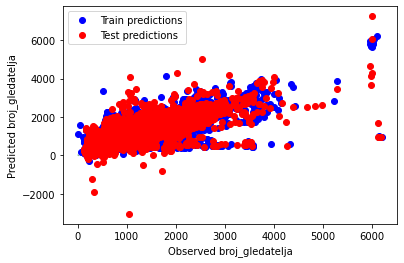

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Predicted ' + chlcol)
plt.legend()

#Ridge regressor

In [45]:
from sklearn.linear_model import Ridge
#reg = Ridge(alpha=0.2,normalize=True,solver='auto',fit_intercept=True)
reg = Ridge(alpha=0.2,normalize=True,solver='svd',fit_intercept=False)

reg.fit(X_train, y_train)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 0.81145247566622
test score 0.8074112050213226


In [46]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':reg.predict(X_test)})
df

,Real Values,Predicted Values
95242,890,830.066614
95162,319,390.279336
98731,872,835.133526
113223,1086,1199.496951
45683,711,864.479749
...,...,...
114683,292,306.091872
96327,2044,2157.446487
102394,328,372.128718
82479,898,1304.783138


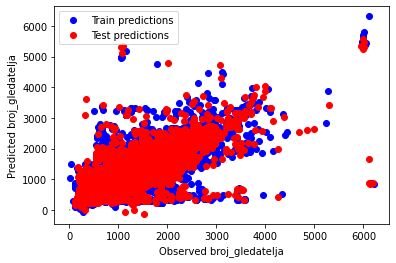

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Predicted ' + chlcol)
plt.legend()

#Elastic net

In [ ]:
from sklearn.linear_model import ElasticNet
#from sklearn.datasets import make_regression
#X, y = make_regression(n_features=2, random_state=0)
#n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=Non
reg = ElasticNet(random_state=0,normalize=True)
reg.fit(X_train, y_train)

print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 6.331341248833056e-06
test score 3.4384970724055104e-06


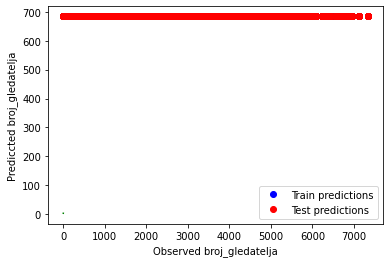

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Predicted ' + chlcol)
plt.legend()

In [ ]:
dataset=total.copy()#.columns
dataset = pd.get_dummies(dataset, columns=['kategorija'], prefix='', prefix_sep='')

dataset.dropna(inplace=True)
#51468.000000
dataset=dataset[dataset['broj_gledatelja']>100]
dataset['repriza']=dataset['repriza'].map({'da':1, 'ne':0 })
look_back=15
#dataset['zero']=[0 for i in dataset['broj_gledatelja']]
 
for i in range(1,look_back+1):
  dataset['increment'+str(i)]=dataset['broj_gledatelja'].shift(periods=(i))
 

In [ ]:
dataset.dropna(inplace=True)
dataset

#LSTM

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
bcols=[  'repriza',  'm_from_start',  'h_x', 'm_x',   'dow',
       'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA', 'IGRANI PROGRAM',
       'OBRAZOVANJE',  'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST','broj_gledatelja' #, 'PROMOCIJA',
       #'increment1', 'increment2', 'increment3', 'increment4' , 'increment5', 'increment6', 'increment7',
       #'increment8', 'increment9', 'increment10', 'increment11', 'increment12',  'increment13', 'increment14',  'increment15'
       ]
dataset=total.copy()#.columns
dataset = pd.get_dummies(dataset, columns=['kategorija'], prefix='', prefix_sep='')

dataset.dropna(inplace=True)
#51468.000000
dataset=dataset[dataset['broj_gledatelja']>100]
dataset['repriza']=dataset['repriza'].map({'da':1, 'ne':0 })
print(dataset.columns)
dataset=dataset[bcols]

#dataset2=dataset[bcols]
scaler = MinMaxScaler(feature_range=(0, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# reshape into X=t and Y=t+1
look_back =  15

#trainX, trainY = #create_dataset(train, look_back)
#testX, testY = #create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX=train[bcols]
trainY=train['broj_gledatelja'].values
testX=test[bcols]
testY=test['broj_gledatelja'].values
print(trainX.shape)
trainX = scaler.fit_transform(trainX)
testX=scaler.transform(testX)
trainX =  numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, len(bcols))))#look_back)))
model.add(Dropout(0.2))
#model.add(Dense(units=output_labels))
model.add(Dense(4, activation="relu", input_dim=look_back))
#odel.add(LSTM(4))#, input_shape=(1,50)))
#model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)




Index(['channel', 'title', 'descr', 'repriza', 'start', 'stop', 'date',
       'broj_gledatelja', 'vrijeme', 'datum_ukupno',
       'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA', 'IGRANI PROGRAM',
       'OBRAZOVANJE', 'PROMOCIJA', 'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST'],
      dtype='object')


KeyError: ignored

In [ ]:
plt.plot(dataset.index,dataset.broj_gledatelja)
plt.plot(train.index,trainPredict)
plt.plot(test.index,testPredict)

In [ ]:
testPredict

In [ ]:

plt.plot( trainY.transpose() ,trainPredict,'bo',linestyle='none',label='Train predictions') 
plt.plot(testY.transpose() ,testPredict,'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed ')
plt.ylabel('Prediccted ' )
plt.legend()
